In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fifa17_raw_data = pd.read_csv("data/FIFA17_official_data.csv")
fifa18_raw_data = pd.read_csv("data/FIFA18_official_data.csv")
fifa19_raw_data = pd.read_csv("data/FIFA19_official_data.csv")
fifa20_raw_data = pd.read_csv("data/FIFA20_official_data.csv")
fifa21_raw_data = pd.read_csv("data/FIFA21_official_data.csv")

old_raw_data = pd.concat([fifa17_raw_data, fifa18_raw_data, fifa19_raw_data, fifa20_raw_data, fifa21_raw_data], ignore_index=True)
old_raw_data.shape

(87642, 65)

In [4]:
old_raw_data.drop(old_raw_data[old_raw_data["Position"] == "GK"].index, inplace=True)
old_raw_data = old_raw_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined",
                                  "Loaned From","Contract Valid Until", "Release Clause", "Best Position", "Best Overall Rating", "Potential",
                                  "ID", "Name", "Nationality", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                                  "Work Rate", "Jersey Number", "Height", "Weight", "Position", "Age", "Marking", "GKDiving", "GKHandling",
                                  "GKKicking", "GKPositioning", "GKReflexes", "DefensiveAwareness"],
                                 axis=1, inplace=False)

old_raw_data.dropna(inplace=True)
old_raw_data.shape

(86935, 29)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = old_raw_data.drop("Overall", axis=1)
y= old_raw_data["Overall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Mean Squared Error:  10.33
R-squared:  0.79


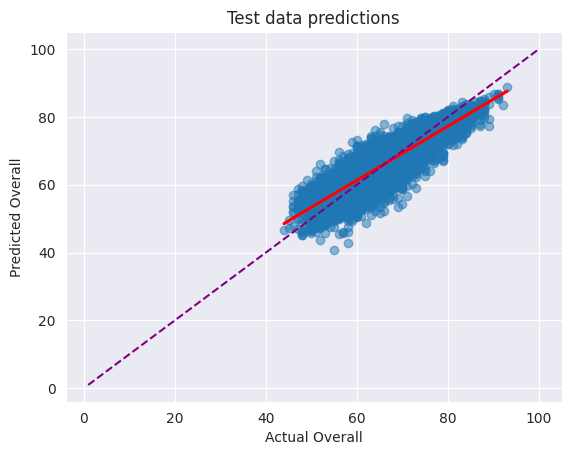

In [6]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Test data predictions")
plt.show();

In [7]:
pred_data = pd.read_csv("data/FIFA22_official_data.csv")

pred_data.drop(pred_data[pred_data["Position"] == "GK"].index, inplace=True)
pred_data = pred_data.drop(["Photo", "Flag", "Club Logo", "Special", "International Reputation", "Body Type", "Real Face", "Joined",
                                  "Loaned From","Contract Valid Until", "Release Clause", "Best Position", "Best Overall Rating", "Potential",
                                  "ID", "Name", "Nationality", "Club", "Value", "Wage", "Preferred Foot", "Weak Foot", "Skill Moves",
                                  "Work Rate", "Jersey Number", "Height", "Weight", "Position", "Age", "Marking", "GKDiving", "GKHandling",
                                  "GKKicking", "GKPositioning", "GKReflexes", "DefensiveAwareness"],
                                 axis=1, inplace=False)
pred_data.dropna(inplace=True)

X_pred = pred_data.drop("Overall", axis=1)
labels = pred_data["Overall"]

Mean Squared Error:  7.86
R-squared:  0.81


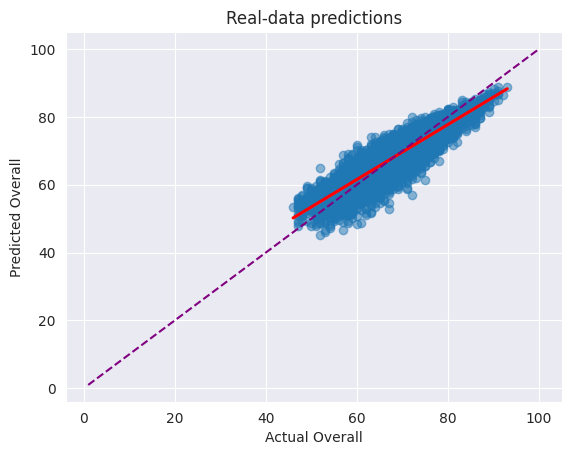

In [8]:
y_pred = reg.predict(X_pred)

mse = mean_squared_error(labels, y_pred)
r2 = r2_score(labels, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=labels, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Real-data predictions")
plt.show();

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
}

grid_search = GridSearchCV(reg, param_grid, cv=4, scoring="r2", verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

best_reg = grid_search.best_estimator_
cv_scores = cross_val_score(best_reg, X_train, y_train, cv=4, scoring="r2")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores) :.2f}")

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.1s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.1s
[CV] END ...................copy_X=False, fit_int

In [10]:
best_reg.fit(X_train, y_train)

y_pred = best_reg.predict(X_test)

Mean Squared Error:  10.33
R-squared:  0.79


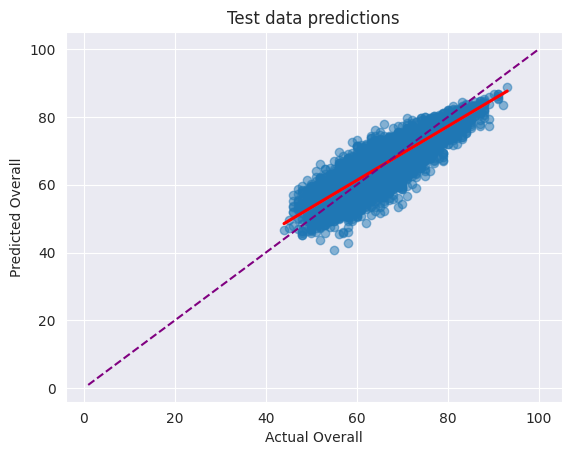

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color": 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Test data predictions")
plt.show();

Mean Squared Error:  7.86
R-squared:  0.81


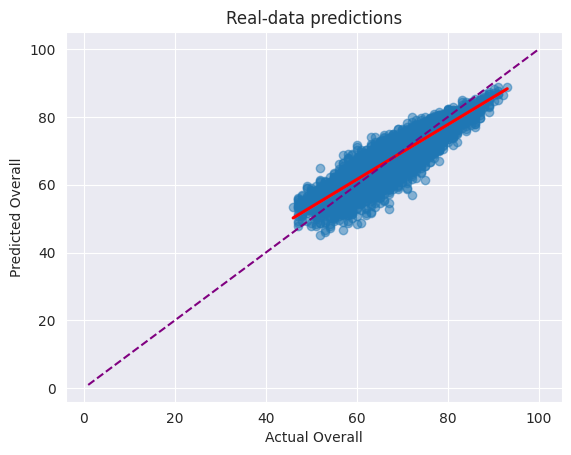

In [12]:
y_pred = best_reg.predict(X_pred)

mse = mean_squared_error(labels, y_pred)
r2 = r2_score(labels, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

sns.regplot(x=labels, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color": 'red'})
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), color="purple", linestyle="dashed")
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Real-data predictions")
plt.show();